# Vintage Analysis

**Vintage Analysis는  신용 포트폴리오의 성능을 시간에 따라 추적하고 분석하는 방법입니다.**  
**이 방법은 특정 연도나 기간에 대해 발행된 모든 대출이나 신용 카드를 대상으로 합니다.**  
**그 후, 각 연도나 기간별로 이루어진 대출의 상환 성공률, 연체율, 불량 부채율 등을 측정하여 신용 포트폴리오의 전반적인 성능을 평가합니다.**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# 예시 데이터 생성
data = {
    'loan_id': [1, 2, 3, 4, 5],
    'issue_date': ['2020-01-01', '2020-01-01', '2020-02-01', '2020-02-01', '2020-03-01'],
    'status': ['Paid', 'Late', 'Paid', 'Default', 'Paid']
}

df = pd.DataFrame(data)
df['issue_date'] = pd.to_datetime(df['issue_date'])

# Vintage year 계산
df['vintage_year'] = df['issue_date'].dt.year

In [25]:
df.head()

,loan_id,issue_date,status,vintage_year
0,1,2020-01-01,Paid,2020
1,2,2020-01-01,Late,2020
2,3,2020-02-01,Paid,2020
3,4,2020-02-01,Default,2020
4,5,2020-03-01,Paid,2020


### Vintage 별 상태 비율 계산

**stack/unstack에 대한 설명**  
https://seong6496.tistory.com/241

In [43]:
test = df.groupby(['vintage_year', 'status']).size() # size():개체의 수를 반환
test

vintage_year  status 
2020          Default    1
              Late       1
              Paid       3
dtype: int64

In [44]:
test = df.groupby(['vintage_year', 'status']).size().unstack() # unstack(): 인덱스를 컬럼으로 보내는 역할 # stack: 컬럼을 인덱스로 보내는 역할
test

status,Default,Late,Paid
vintage_year,,,
2020,1,1,3


In [26]:
vintage_analysis = df.groupby(['vintage_year', 'status']).size().unstack(fill_value=0)

In [27]:
vintage_analysis

status,Default,Late,Paid
vintage_year,,,
2020,1,1,3


In [28]:
vintage_analysis['Total'] = vintage_analysis.sum(axis=1)

In [29]:
vintage_analysis

status,Default,Late,Paid,Total
vintage_year,,,,
2020,1,1,3,5


In [30]:
vintage_analysis['Paid_Ratio'] = (vintage_analysis['Paid'] / vintage_analysis['Total']) * 100

In [31]:
vintage_analysis

status,Default,Late,Paid,Total,Paid_Ratio
vintage_year,,,,,
2020,1,1,3,5,60.0


In [32]:
vintage_analysis['Default_Ratio'] = (vintage_analysis['Default'] / vintage_analysis['Total']) * 100

In [33]:
vintage_analysis

status,Default,Late,Paid,Total,Paid_Ratio,Default_Ratio
vintage_year,,,,,,
2020,1,1,3,5,60.0,20.0


In [34]:
# 결과 출력
print(vintage_analysis)

status        Default  Late  Paid  Total  Paid_Ratio  Default_Ratio
vintage_year                                                       
2020                1     1     3      5        60.0           20.0


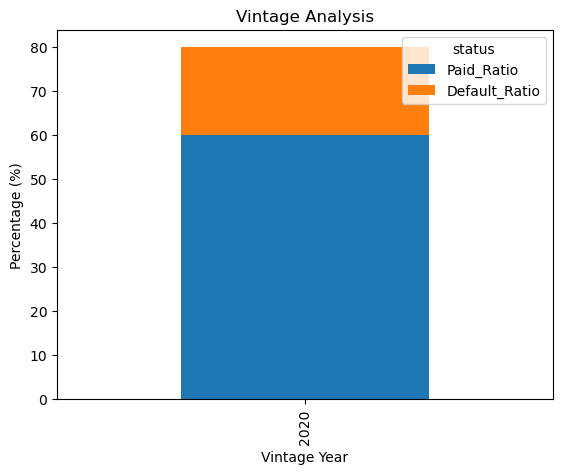

In [35]:
# Vintage 별 상태 비율 시각화
vintage_analysis[['Paid_Ratio', 'Default_Ratio']].plot(kind='bar', stacked=True)
plt.title('Vintage Analysis')
plt.xlabel('Vintage Year')
plt.ylabel('Percentage (%)')
plt.show()